In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.cm as cm
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
pga2023 = pd.read_csv('new_pga.csv')
pga2023

,RK,NAME,AGE,EARNINGS,CUP,EVNTS,RNDS,CUTS,TOPtens,WINS,SCORE,DDIS,DACC,GIR,PUTTS,SAND,BIRDS
0,1,Scottie Scheffler,27,21014342.0,4218,23,88,23,17,2,68.3,310.3,62.1,74.4,1.735,44.2,4.409
1,2,Jon Rahm,29,16522608.0,3486,20,71,18,10,4,68.8,314.0,57.7,70.5,1.711,49.5,4.493
2,3,Viktor Hovland,26,14112235.0,4024,23,88,23,9,3,68.9,307.6,63.7,68.2,1.716,58.3,4.409
3,4,Rory McIlroy,34,13921008.0,3494,18,64,16,13,2,68.9,326.3,53.3,67.9,1.730,50.6,4.297
4,5,Max Homa,33,10761517.0,2871,25,86,21,13,2,69.2,304.8,60.1,66.9,1.699,55.6,4.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,George McNeill,48,16834.0,6,6,0,2,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
239,240,Arjun Atwal,50,16367.0,8,10,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
240,241,Scott Gutschewski,47,14690.0,5,1,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
241,242,Bo Van Pelt,48,11172.0,6,7,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000


In [3]:
pga2024 = pd.read_csv('2024pga.csv')
pga2024

,RK,NAME,AGE,EARNINGS,CUP,EVNTS,RNDS,CUTS,TOP10,WINS,SCORE,DDIS,DACC,GIR,PUTTS,SAND,BIRDS
0,1,Scottie Scheffler,27,18693236,3915,10,39,10,9,4,67.5,299.3,74.4,74.8,1.669,43.2,5.385
1,2,Wyndham Clark,30,9164429,1906,11,39,9,4,1,69.2,313.8,59.5,68.4,1.694,65.5,4.564
2,3,Xander Schauffele,30,7688071,1939,12,43,11,8,0,68.8,304.6,67.8,69.1,1.730,56.5,4.326
3,4,Sahith Theegala,26,6612228,1529,13,45,11,5,0,69.7,303.4,63.8,68.5,1.735,51.4,4.178
4,5,Rory McIlroy,35,6600722,1675,10,35,9,3,2,69.9,316.8,68.7,65.6,1.738,61.7,4.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Sangmoon Bae,37,8800,3,3,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
225,226,Anders Albertson,30,8760,3,1,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
226,227,Ryan Armour,48,8360,2,2,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
227,227,Brian Stuard,41,8360,2,2,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000


In [4]:
df = pd.merge(pga2023, pga2024, on='NAME', how='inner')
df

,RK_x,NAME,AGE_x,EARNINGS_x,CUP_x,EVNTS_x,RNDS_x,CUTS_x,TOPtens,WINS_x,...,CUTS_y,TOP10,WINS_y,SCORE_y,DDIS_y,DACC_y,GIR_y,PUTTS_y,SAND_y,BIRDS_y
0,1,Scottie Scheffler,27,21014342.0,4218,23,88,23,17,2,...,10,9,4,67.5,299.3,74.4,74.8,1.669,43.2,5.385
1,3,Viktor Hovland,26,14112235.0,4024,23,88,23,9,3,...,6,0,0,71.0,300.2,62.6,65.8,1.740,38.9,4.080
2,4,Rory McIlroy,34,13921008.0,3494,18,64,16,13,2,...,9,3,2,69.9,316.8,68.7,65.6,1.738,61.7,4.257
3,5,Max Homa,33,10761517.0,2871,25,86,21,13,2,...,10,3,0,70.4,300.6,62.6,65.2,1.748,61.7,4.073
4,6,Wyndham Clark,30,10757490.0,2157,28,102,24,8,2,...,9,4,1,69.2,313.8,59.5,68.4,1.694,65.5,4.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,222,Anders Albertson,30,87639.0,34,9,0,4,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
178,223,Kyle Stanley,36,84721.0,11,18,0,4,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
179,227,Tiger Woods,48,59560.0,11,2,0,1,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
180,230,Sangmoon Bae,37,57871.0,12,8,0,3,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000


In [5]:
df['NAME'].tolist()

['Scottie Scheffler',
 'Viktor Hovland',
 'Rory McIlroy',
 'Max Homa',
 'Wyndham Clark',
 'Patrick Cantlay',
 'Brian Harman',
 'Keegan Bradley',
 'Xander Schauffele',
 'Tyrrell Hatton',
 'Matt Fitzpatrick',
 'Rickie Fowler',
 'Tom Kim',
 'Collin Morikawa',
 'Sahith Theegala',
 'Jordan Spieth',
 'Sam Burns',
 'Jason Day',
 'Kurt Kitayama',
 'Denny McCarthy',
 'Sungjae Im',
 'Tommy Fleetwood',
 'Lucas Glover',
 'Russell Henley',
 'Nick Taylor',
 'Tony Finau',
 'Harris English',
 'Corey Conners',
 'Emiliano Grillo',
 'Eric Cole',
 'Si Woo Kim',
 'Cameron Young',
 'Sepp Straka',
 'Taylor Moore',
 'Cam Davis',
 'Adam Schenk',
 'Adam Svensson',
 'Tom Hoge',
 'Adam Hadwin',
 'Justin Rose',
 'Andrew Putnam',
 'Mackenzie Hughes',
 'Chris Kirk',
 'Brendon Todd',
 'Hideki Matsuyama',
 'Matt Kuchar',
 'Séamus Power',
 'Lee Hodges',
 'J.T. Poston',
 'Beau Hossler',
 'Justin Thomas',
 'Adam Scott',
 'Byeong Hun An',
 'Ludvig Åberg',
 'Alex Smalley',
 'Taylor Montgomery',
 'Justin Suh',
 'Keith Mitch

In [6]:
df['EARNINGS_y']

0      18693236
1        819525
2       6600722
3       3228533
4       9164429
         ...   
177        8760
178        8800
179       44400
180        8800
181       27175
Name: EARNINGS_y, Length: 182, dtype: int64

In [7]:
df['total_earnings'] = df['EARNINGS_x'] + df['EARNINGS_y']

In [8]:
earnings = df[['NAME', 'total_earnings']]
earnings = earnings.sort_values(by='total_earnings', ascending=False)
earnings = earnings.head(25)
earnings

,NAME,total_earnings
0,Scottie Scheffler,39707578.0
2,Rory McIlroy,20521730.0
4,Wyndham Clark,19921919.0
8,Xander Schauffele,16147137.0
1,Viktor Hovland,14931760.0
3,Max Homa,13990050.0
14,Sahith Theegala,13896898.0
5,Patrick Cantlay,13815097.0
6,Brian Harman,12891700.0
13,Collin Morikawa,10871180.0


In [9]:
df['total_wins'] = df['WINS_x'] + df['WINS_y']

In [10]:
wins = df[['NAME', 'total_wins']]
wins = wins.sort_values(by='total_wins', ascending=False)
wins = wins.head(49)
wins

,NAME,total_wins
0,Scottie Scheffler,6
2,Rory McIlroy,4
4,Wyndham Clark,3
1,Viktor Hovland,3
12,Tom Kim,2
24,Nick Taylor,2
79,Akshay Bhatia,2
25,Tony Finau,2
22,Lucas Glover,2
7,Keegan Bradley,2


In [11]:
df['avg_score'] = ((df['SCORE_x'] + df['SCORE_y']) / 2)

In [13]:
score = df[['NAME', 'avg_score']]
score = score.drop(score[score['avg_score'] < 50].index)
score = score.sort_values(by='avg_score', ascending=True)
score = score.head(27)
score

,NAME,avg_score
0,Scottie Scheffler,67.90
53,Ludvig Åberg,68.85
8,Xander Schauffele,68.95
4,Wyndham Clark,69.30
2,Rory McIlroy,69.40
69,Alex Noren,69.40
64,Ben Griffin,69.45
5,Patrick Cantlay,69.45
72,Stephan Jaeger,69.50
79,Akshay Bhatia,69.55


In [14]:
df.columns

Index(['RK_x', 'NAME', 'AGE_x', 'EARNINGS_x', 'CUP_x', 'EVNTS_x', 'RNDS_x',
       'CUTS_x', 'TOPtens', 'WINS_x', 'SCORE_x', 'DDIS_x', 'DACC_x', 'GIR_x',
       'PUTTS_x', 'SAND_x', 'BIRDS_x', 'RK_y', 'AGE_y', 'EARNINGS_y', 'CUP_y',
       'EVNTS_y', 'RNDS_y', 'CUTS_y', 'TOP10', 'WINS_y', 'SCORE_y', 'DDIS_y',
       'DACC_y', 'GIR_y', 'PUTTS_y', 'SAND_y', 'BIRDS_y', 'total_earnings',
       'total_wins', 'avg_score'],
      dtype='object')

In [15]:
df['top_tens'] = df['TOPtens'] + df['TOP10']

In [18]:
top_tens = df[['NAME', 'top_tens']]
top_tens = top_tens.sort_values(by='top_tens', ascending=False)
top_tens = top_tens.head(26)
top_tens

,NAME,top_tens
0,Scottie Scheffler,26
8,Xander Schauffele,19
2,Rory McIlroy,16
3,Max Homa,16
14,Sahith Theegala,13
48,J.T. Poston,12
17,Jason Day,12
21,Tommy Fleetwood,12
5,Patrick Cantlay,12
4,Wyndham Clark,12


In [19]:
country = pd.read_csv('pga_country.csv')
country

,NAME,COUNTRY
0,Scottie Scheffler,USA
1,Viktor Hovland,Europe
2,Rory McIlroy,Europe
3,Max Homa,USA
4,Wyndham Clark,USA
...,...,...
177,Anders Albertson,USA
178,Kyle Stanley,USA
179,Tiger Woods,USA
180,Sangmoon Bae,Asia


In [20]:
pd.merge(df, country, on='NAME', how='inner')

,RK_x,NAME,AGE_x,EARNINGS_x,CUP_x,EVNTS_x,RNDS_x,CUTS_x,TOPtens,WINS_x,...,DACC_y,GIR_y,PUTTS_y,SAND_y,BIRDS_y,total_earnings,total_wins,avg_score,top_tens,COUNTRY
0,1,Scottie Scheffler,27,21014342.0,4218,23,88,23,17,2,...,74.4,74.8,1.669,43.2,5.385,39707578.0,6,67.90,26,USA
1,3,Viktor Hovland,26,14112235.0,4024,23,88,23,9,3,...,62.6,65.8,1.740,38.9,4.080,14931760.0,3,69.95,9,Europe
2,4,Rory McIlroy,34,13921008.0,3494,18,64,16,13,2,...,68.7,65.6,1.738,61.7,4.257,20521730.0,4,69.40,16,Europe
3,5,Max Homa,33,10761517.0,2871,25,86,21,13,2,...,62.6,65.2,1.748,61.7,4.073,13990050.0,2,69.80,16,USA
4,6,Wyndham Clark,30,10757490.0,2157,28,102,24,8,2,...,59.5,68.4,1.694,65.5,4.564,19921919.0,3,69.30,12,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,222,Anders Albertson,30,87639.0,34,9,0,4,0,0,...,0.0,0.0,0.000,0.0,0.000,96399.0,0,0.00,0,USA
178,223,Kyle Stanley,36,84721.0,11,18,0,4,0,0,...,0.0,0.0,0.000,0.0,0.000,93521.0,0,0.00,0,USA
179,227,Tiger Woods,48,59560.0,11,2,0,1,0,0,...,0.0,0.0,0.000,0.0,0.000,103960.0,0,0.00,0,USA
180,230,Sangmoon Bae,37,57871.0,12,8,0,3,0,0,...,0.0,0.0,0.000,0.0,0.000,66671.0,0,0.00,0,Asia


In [21]:
df['putts'] = (df['PUTTS_x'] + df['PUTTS_y']) / 2

In [22]:
putts = df[['NAME', 'putts']]
putts = putts.drop(putts[putts['putts'] < 1].index)
putts = putts.sort_values(by='putts', ascending=True)
putts = putts.head(25)
putts

,NAME,putts
0,Scottie Scheffler,1.7020
61,Sam Ryder,1.7065
55,Taylor Montgomery,1.7065
4,Wyndham Clark,1.7105
89,Christiaan Bezuidenhout,1.7135
15,Jordan Spieth,1.7150
16,Sam Burns,1.7150
19,Denny McCarthy,1.7165
29,Eric Cole,1.7165
43,Brendon Todd,1.7195


In [23]:
df['cuts_made'] = df['CUTS_x'] + df['CUTS_y']

In [27]:
cuts = df[['NAME', 'cuts_made']]
cuts = cuts.sort_values(by='cuts_made', ascending=False)
cuts = cuts.head(29)
cuts

,NAME,cuts_made
72,Stephan Jaeger,40
29,Eric Cole,38
64,Ben Griffin,37
36,Adam Svensson,37
30,Si Woo Kim,36
14,Sahith Theegala,36
40,Andrew Putnam,35
37,Tom Hoge,35
35,Adam Schenk,35
62,Mark Hubbard,34


In [28]:
df['events'] = df['EVNTS_x'] + df['EVNTS_y']

In [29]:
events = df[['NAME', 'events', 'cuts_made']]
events = events.sort_values(by='events', ascending=False)
events

,NAME,events,cuts_made
29,Eric Cole,53,38
64,Ben Griffin,53,37
113,Justin Lower,52,29
62,Mark Hubbard,52,34
76,S.H. Kim,52,32
...,...,...,...
155,Padraig Harrington,12,8
181,Scott Gutschewski,12,3
180,Sangmoon Bae,11,4
177,Anders Albertson,10,5


In [30]:
events['cut_percentage'] = events['cuts_made'] / events['events'] 
events = events.sort_values(by='cut_percentage', ascending=False)
events = events.head(25)
events

,NAME,events,cuts_made,cut_percentage
0,Scottie Scheffler,33,33,1.000000
1,Viktor Hovland,30,29,0.966667
9,Tyrrell Hatton,24,23,0.958333
53,Ludvig Åberg,23,22,0.956522
8,Xander Schauffele,35,32,0.914286
31,Cameron Young,35,32,0.914286
51,Adam Scott,28,25,0.892857
2,Rory McIlroy,28,25,0.892857
5,Patrick Cantlay,32,28,0.875000
72,Stephan Jaeger,46,40,0.869565


In [31]:
df['drive_dist'] = (df['DDIS_x'] + df['DDIS_y']) / 2

In [32]:
drive_dist = df[['NAME', 'drive_dist']]
drive_dist = drive_dist.drop(drive_dist[drive_dist['drive_dist'] < 200].index)
drive_dist = drive_dist.sort_values(by='drive_dist', ascending=False)
drive_dist = drive_dist.head(25)
drive_dist

,NAME,drive_dist
2,Rory McIlroy,321.55
129,Cameron Champ,317.55
52,Byeong Hun An,314.55
4,Wyndham Clark,313.65
53,Ludvig Åberg,312.40
81,Gary Woodland,311.90
102,Vincent Norrman,311.75
90,Taylor Pendrith,310.75
104,Joseph Bramlett,310.45
57,Keith Mitchell,310.40


In [33]:
df['drive_acc'] = (df['DACC_x'] + df['DACC_y']) / 2

In [36]:
drive_acc = df[['NAME', 'drive_acc']]
drive_acc = drive_acc.drop(drive_acc[drive_acc['drive_acc'] == 0].index)
drive_acc = drive_acc.sort_values(by='drive_acc', ascending=False)
drive_acc = drive_acc.head(25)
drive_acc

,NAME,drive_acc
13,Collin Morikawa,73.40
23,Russell Henley,73.25
22,Lucas Glover,72.45
30,Si Woo Kim,72.35
70,Shane Lowry,71.65
32,Sepp Straka,71.25
122,Ryan Moore,70.25
74,Aaron Rai,70.15
21,Tommy Fleetwood,69.80
12,Tom Kim,68.70


In [37]:
# earnings, wins, score, top_tens, putts, drive_dist, drive_acc, events

In [41]:
tables = [earnings, wins, score, top_tens, putts, drive_dist, drive_acc, events]

In [42]:
player_counts = {}

for df in tables:
    for player in df['NAME']:
        if player in player_counts:
            player_counts[player] += 1
        else:
            player_counts[player] = 1

for player, count in player_counts.items():
    print(f"{player}: {count}")

Scottie Scheffler: 7
Rory McIlroy: 6
Wyndham Clark: 7
Xander Schauffele: 5
Viktor Hovland: 5
Max Homa: 5
Sahith Theegala: 5
Patrick Cantlay: 4
Brian Harman: 6
Collin Morikawa: 5
Keegan Bradley: 2
Matt Fitzpatrick: 3
Jason Day: 6
Hideki Matsuyama: 3
Sam Burns: 5
Ludvig Åberg: 8
Jordan Spieth: 3
Tyrrell Hatton: 2
Russell Henley: 6
Denny McCarthy: 5
Sungjae Im: 2
Chris Kirk: 3
Nick Taylor: 4
Tommy Fleetwood: 4
Tom Kim: 5
Akshay Bhatia: 3
Tony Finau: 3
Lucas Glover: 2
Séamus Power: 1
Nick Hardy: 1
Luke List: 1
Mackenzie Hughes: 1
Davis Riley: 1
Lee Hodges: 1
Erik van Rooyen: 2
Shane Lowry: 3
Stephan Jaeger: 4
Austin Eckroat: 2
Adam Svensson: 1
Camilo Villegas: 1
Taylor Pendrith: 2
Vincent Norrman: 2
Matt Wallace: 1
Peter Malnati: 1
Nico Echavarria: 1
Brice Garnett: 1
Grayson Murray: 1
Justin Rose: 1
Billy Horschel: 1
Rickie Fowler: 2
Taylor Moore: 1
Sepp Straka: 2
Si Woo Kim: 4
Kurt Kitayama: 1
Emiliano Grillo: 2
Corey Conners: 2
Alex Noren: 1
Ben Griffin: 1
Tom Hoge: 2
Davis Thompson: 2
A

In [43]:
player_counts_df = pd.DataFrame(player_counts.items(), columns=['NAME', 'Count'])

player_counts_df

,NAME,Count
0,Scottie Scheffler,7
1,Rory McIlroy,6
2,Wyndham Clark,7
3,Xander Schauffele,5
4,Viktor Hovland,5
...,...,...
93,Tyler Duncan,1
94,Carson Young,1
95,Zac Blair,1
96,Troy Merritt,1


In [44]:
team = pd.merge(player_counts_df, country, on='NAME')
team.head(50)

,NAME,Count,COUNTRY
0,Scottie Scheffler,7,USA
1,Rory McIlroy,6,Europe
2,Wyndham Clark,7,USA
3,Xander Schauffele,5,USA
4,Viktor Hovland,5,Europe
5,Max Homa,5,USA
6,Sahith Theegala,5,USA
7,Patrick Cantlay,4,USA
8,Brian Harman,6,USA
9,Collin Morikawa,5,USA


In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encoding countries using LabelEncoder
label_encoder = LabelEncoder()
team['Country_Code'] = label_encoder.fit_transform(team['COUNTRY'])

# Standardizing the data
scaler = StandardScaler()
team[['Country_Code']] = scaler.fit_transform(team[['Country_Code']])

# Creating KMeans instance
kmeans = KMeans(n_clusters=5)

# Fitting the model
kmeans.fit(team[['Country_Code']])

# Adding cluster labels to the DataFrame
team['Cluster'] = kmeans.labels_
team

/Users/elliott/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NAME,Count,COUNTRY,Country_Code,Cluster
0,Scottie Scheffler,7,USA,0.706703,1
1,Rory McIlroy,6,Europe,-1.003344,2
2,Wyndham Clark,7,USA,0.706703,1
3,Xander Schauffele,5,USA,0.706703,1
4,Viktor Hovland,5,Europe,-1.003344,2
...,...,...,...,...,...
93,Tyler Duncan,1,USA,0.706703,1
94,Carson Young,1,USA,0.706703,1
95,Zac Blair,1,USA,0.706703,1
96,Troy Merritt,1,USA,0.706703,1


In [46]:
team.head(30)

,NAME,Count,COUNTRY,Country_Code,Cluster
0,Scottie Scheffler,7,USA,0.706703,1
1,Rory McIlroy,6,Europe,-1.003344,2
2,Wyndham Clark,7,USA,0.706703,1
3,Xander Schauffele,5,USA,0.706703,1
4,Viktor Hovland,5,Europe,-1.003344,2
5,Max Homa,5,USA,0.706703,1
6,Sahith Theegala,5,USA,0.706703,1
7,Patrick Cantlay,4,USA,0.706703,1
8,Brian Harman,6,USA,0.706703,1
9,Collin Morikawa,5,USA,0.706703,1


In [49]:
usa = team[team['Cluster'] == 1]
europe = team[team['Cluster'] == 2]

In [50]:
usa = usa.sort_values(by='Count', ascending=False)
usa = usa.head(30)
usa

,NAME,Count,COUNTRY,Country_Code,Cluster
0,Scottie Scheffler,7,USA,0.706703,1
2,Wyndham Clark,7,USA,0.706703,1
8,Brian Harman,6,USA,0.706703,1
18,Russell Henley,6,USA,0.706703,1
3,Xander Schauffele,5,USA,0.706703,1
5,Max Homa,5,USA,0.706703,1
6,Sahith Theegala,5,USA,0.706703,1
9,Collin Morikawa,5,USA,0.706703,1
14,Sam Burns,5,USA,0.706703,1
19,Denny McCarthy,5,USA,0.706703,1


In [51]:
europe = europe.sort_values(by='Count', ascending=False)
europe

,NAME,Count,COUNTRY,Country_Code,Cluster
15,Ludvig Åberg,8,Europe,-1.003344,2
1,Rory McIlroy,6,Europe,-1.003344,2
4,Viktor Hovland,5,Europe,-1.003344,2
23,Tommy Fleetwood,4,Europe,-1.003344,2
36,Stephan Jaeger,4,Europe,-1.003344,2
11,Matt Fitzpatrick,3,Europe,-1.003344,2
35,Shane Lowry,3,Europe,-1.003344,2
60,Aaron Rai,2,Europe,-1.003344,2
51,Sepp Straka,2,Europe,-1.003344,2
41,Vincent Norrman,2,Europe,-1.003344,2


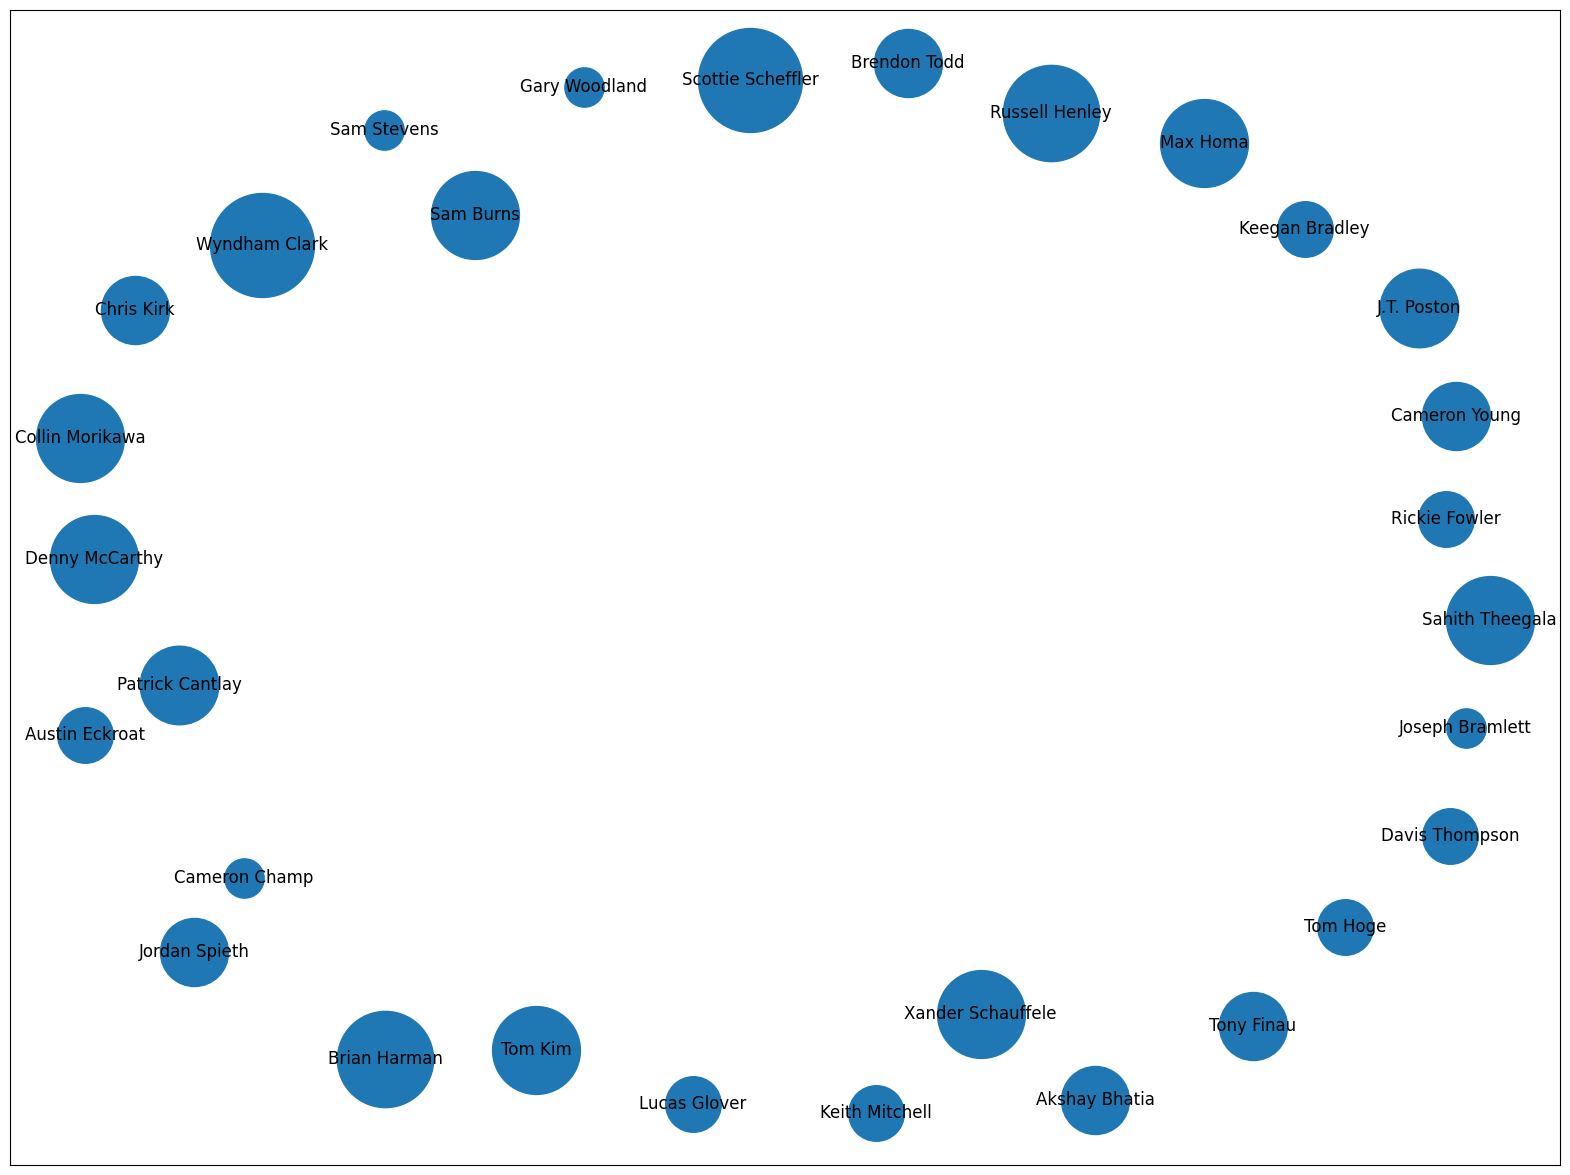

In [52]:
G1 = nx.Graph()

plt.figure(figsize=(20,15))

# Add nodes for USA players
for _, row in usa.iterrows():
    G1.add_node(row['NAME'], count=row['Count'], region='USA')

pos = nx.spring_layout(G1)
for node in G1.nodes():
    nx.draw_networkx_nodes(G1, pos, nodelist=[node], node_size=G1.nodes[node]['count']*800, label=node)
nx.draw_networkx_labels(G1, pos)
plt.show()

/var/folders/8n/nxcdwx4n3q13d_zz_ph0cqsh0000gn/T/ipykernel_12545/2783013594.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Pastel2')


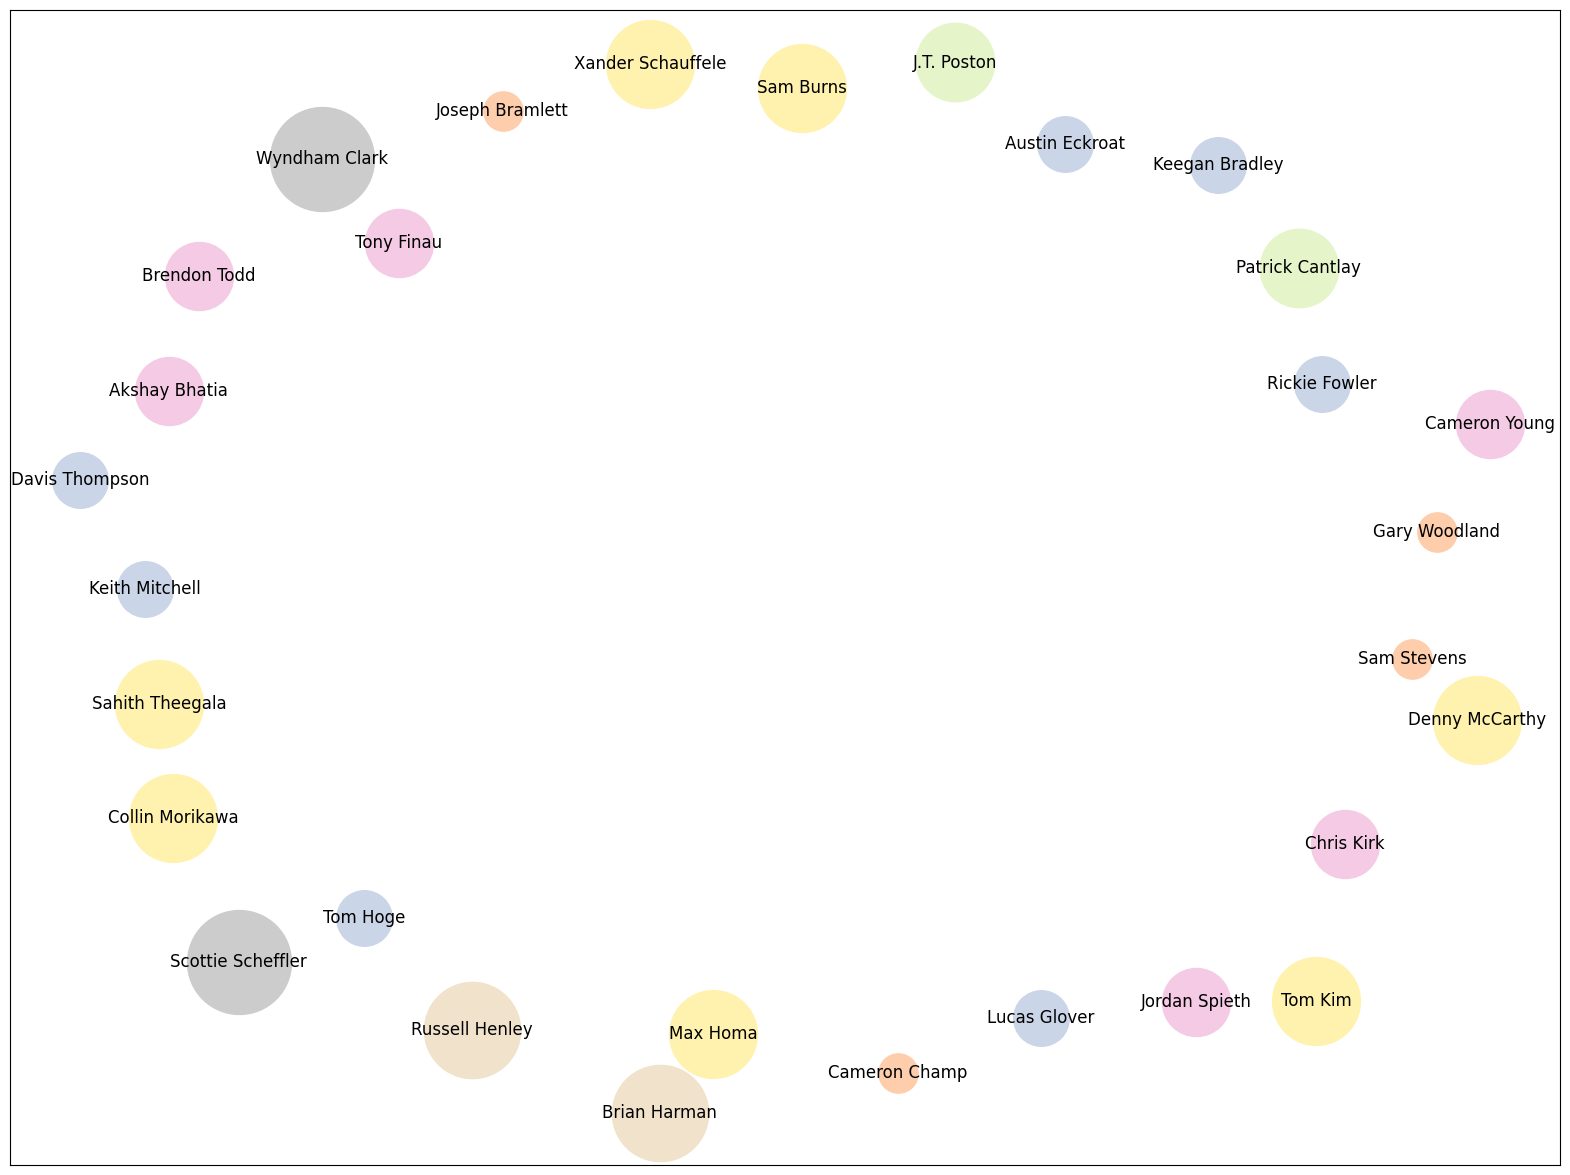

In [67]:
plt.figure(figsize=(20, 15))

# Define a colormap
cmap = cm.get_cmap('Pastel2')

# Draw the graph
pos = nx.spring_layout(G1)
for node in G1.nodes():
    count = G1.nodes[node]['count']
    color = cmap(count / max(G1.nodes[node]['count'] for node in G1.nodes()))
    nx.draw_networkx_nodes(G1, pos, nodelist=[node], node_size=count*800, node_color=color, label=node)
nx.draw_networkx_labels(G1, pos)
plt.show()

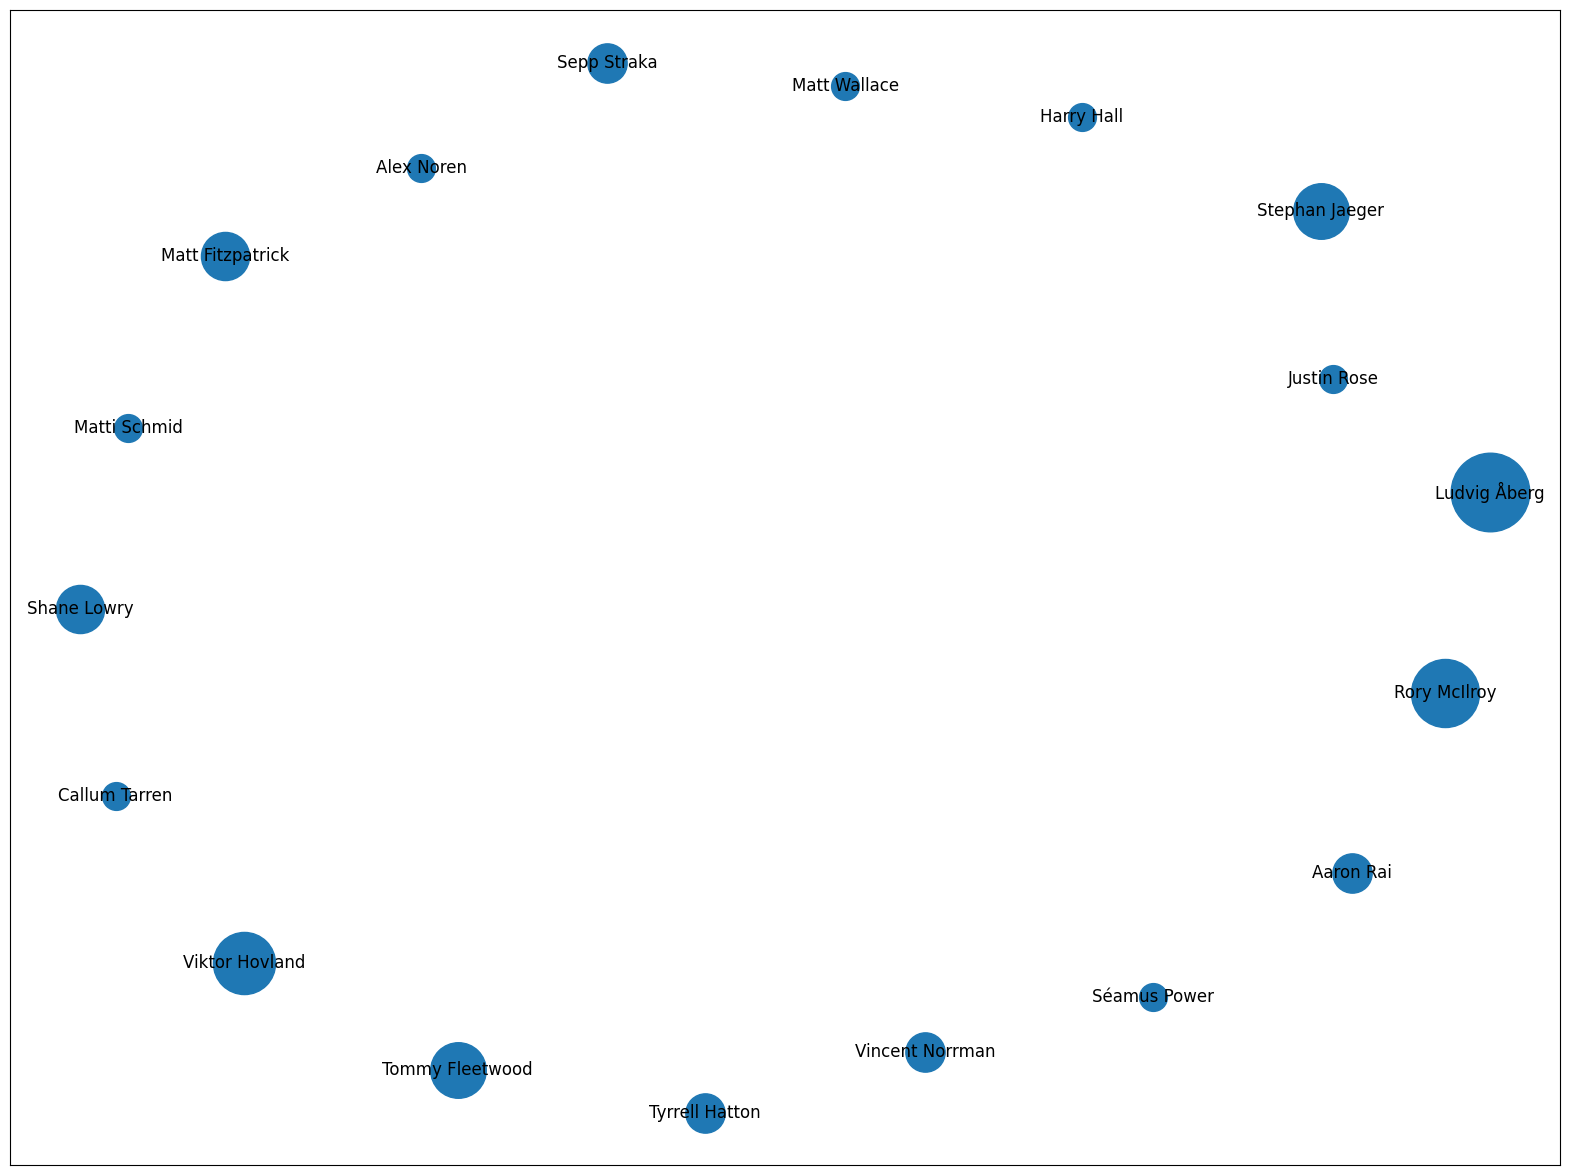

In [54]:
# Add nodes for Europe players
G = nx.Graph()

plt.figure(figsize=(20, 15))

for _, row in europe.iterrows():
    G.add_node(row['NAME'], count=row['Count'], region='Europe')

# Draw the graph
pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=G.nodes[node]['count']*400, label=node)
nx.draw_networkx_labels(G, pos)
plt.show()

/var/folders/8n/nxcdwx4n3q13d_zz_ph0cqsh0000gn/T/ipykernel_12545/1797072383.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Pastel2')


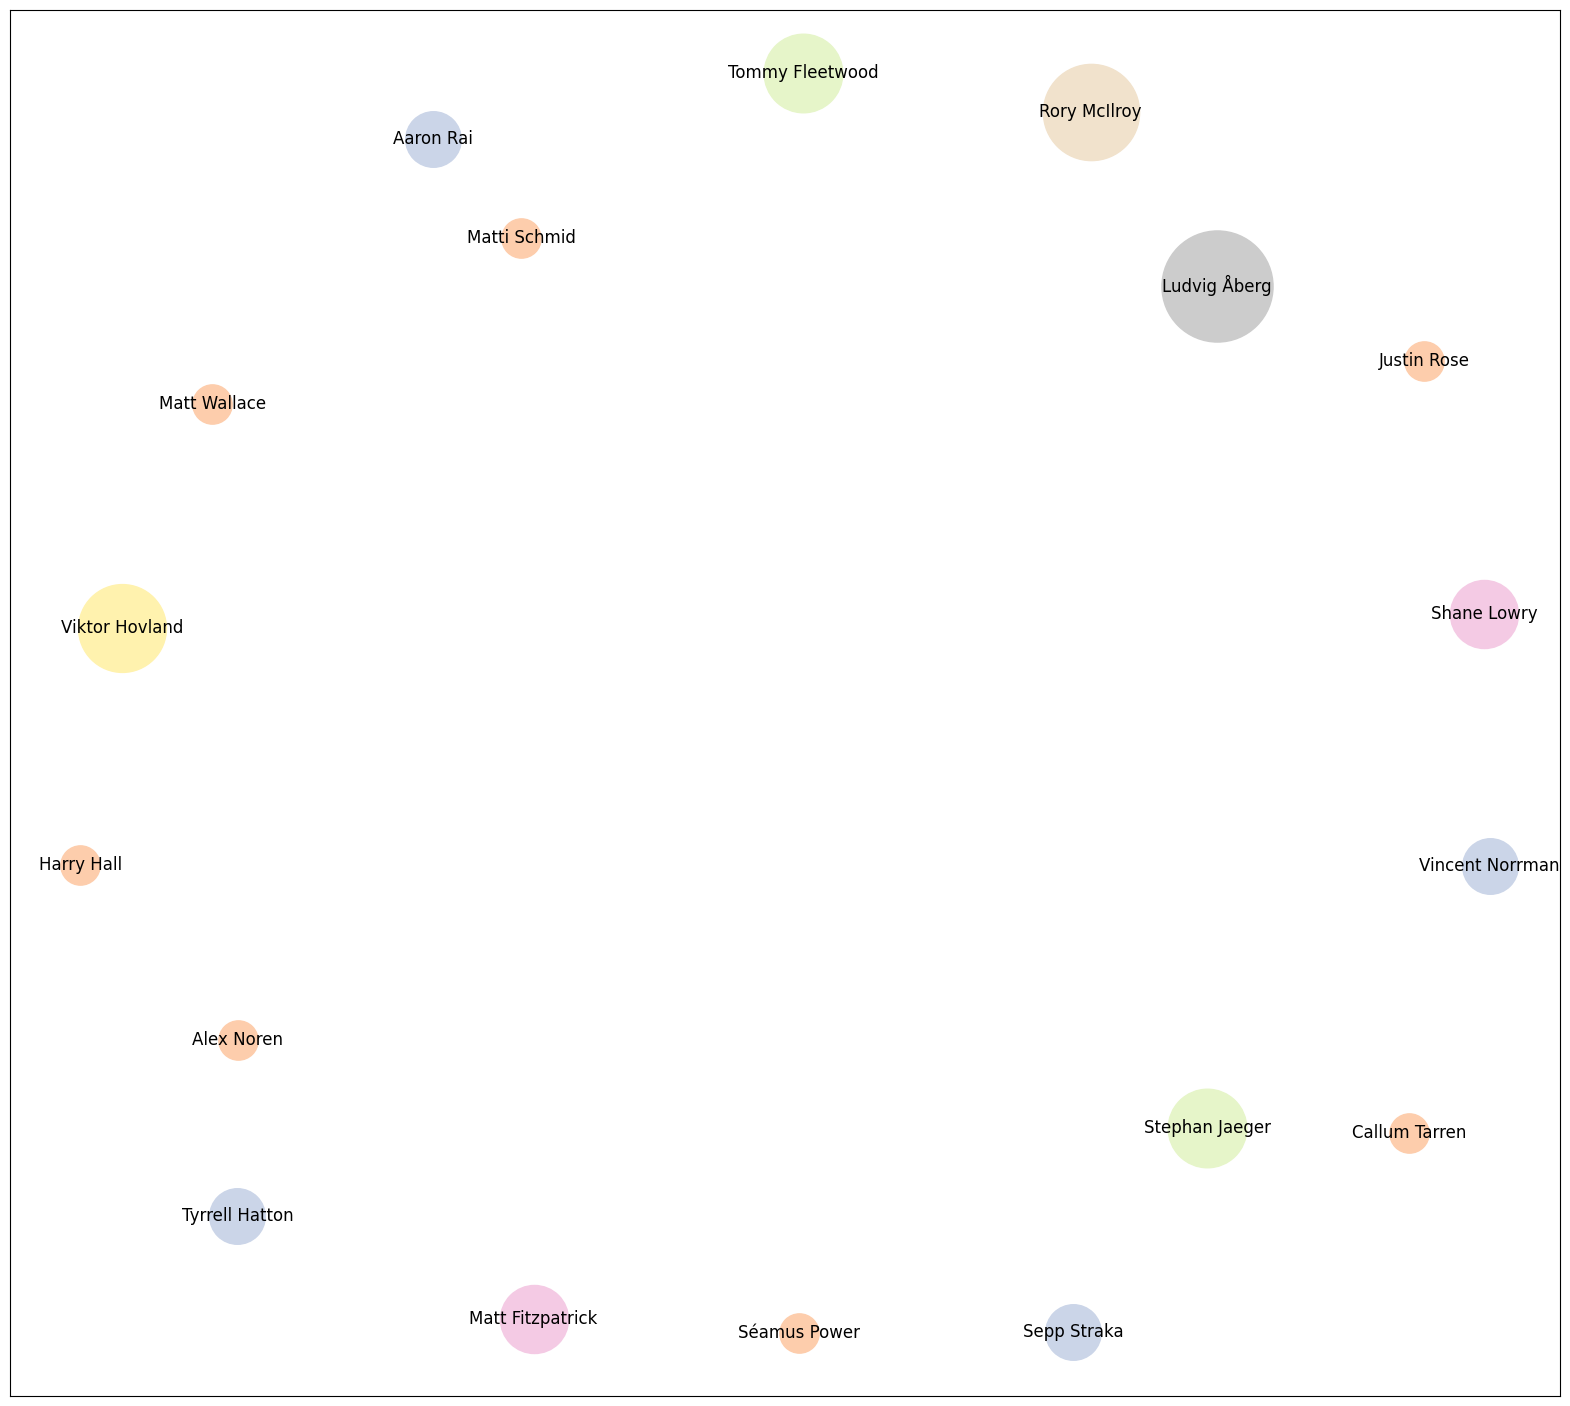

In [59]:
# Create a new figure
plt.figure(figsize=(20, 18))

# Define a colormap
cmap = cm.get_cmap('Pastel2')

# Draw the graph
pos = nx.spring_layout(G)
for node in G.nodes():
    count = G.nodes[node]['count']
    color = cmap(count / max(G.nodes[node]['count'] for node in G.nodes()))
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=count*800, node_color=color, label=node)
nx.draw_networkx_labels(G, pos)
plt.show()

In [87]:
def euclidean_distance(golfer1, golfer2):
    distance_sum = 0
    for table_name, table_data in tables.items():
        # Check if golfer1 and golfer2 exist in the current table
        if 'NAME' in table_data.columns and golfer1 in table_data['NAME'].values and golfer2 in table_data['NAME'].values:
            # Extract features of golfer1 and golfer2 from each table
            golfer1_features = table_data.loc[table_data['NAME'] == golfer1].iloc[:, 1:].values.flatten()
            golfer2_features = table_data.loc[table_data['NAME'] == golfer2].iloc[:, 1:].values.flatten()
            # Check if features are not empty
            if golfer1_features.size > 0 and golfer2_features.size > 0:
                # Calculate Euclidean distance between features
                distance_sum += np.linalg.norm(golfer1_features - golfer2_features)
    return distance_sum

def next_most_similar(golfer, k=5):
    distances = []
    for table_name, table_data in tables.items():
        if 'NAME' in table_data.columns and golfer in table_data['NAME'].values:
            for other_golfer in table_data['NAME']:
                if other_golfer != golfer:
                    distance = euclidean_distance(golfer, other_golfer)
                    distances.append((other_golfer, distance))
    if distances:
        distances.sort(key=lambda x: x[1])
        return distances[:k]
    else:
        return []

def main():
    # Prompt the player to input a golfer's name
    golfer_name = input("Enter the name of the golfer: ")
    print(f"Calculating next most similar golfers to {golfer_name}...\n")
    
    # Check if the golfer name exists in at least one of the tables
    similar_golfers = next_most_similar(golfer_name)
    
    if similar_golfers:
        # Print the results
        print("Next most similar golfers:")
        for idx, (golfer, distance) in enumerate(similar_golfers, start=1):
            print(f"{idx}. {golfer}, Euclidean Distance: {distance}")
    else:
        print("Golfer not found in the data or not enough data to calculate similarity.")

if __name__ == "__main__":
    main()

Enter the name of the golfer: Tyrrell Hatton
Calculating next most similar golfers to Tyrrell Hatton...

Next most similar golfers:
1. Shane Lowry, Euclidean Distance: 4.002342178504007
2. Adam Scott, Euclidean Distance: 4.472615245191483
3. Cameron Young, Euclidean Distance: 14.21273865913054
4. Tony Finau, Euclidean Distance: 14.42253279283822
5. Corey Conners, Euclidean Distance: 16.643722809644984
